In [1]:
# Jupyter magic
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# imports
import pandas as pd
import pathlib
import numpy as np

# pd.options.display.max_rows = None
pd.options.display.max_columns = None
# pd.options.display.max_colwidth = -1

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

### Load CEO lists from Crunchbase

These lists were generated by searching for CEOs of organizations that were mentioned in 4 to 5000 articles listed in Crunchbase.

In [3]:
data_dir = "../1_data/potential_CEOs/"
p = pathlib.Path(data_dir)

CEO_df = pd.DataFrame()
for file_path in p.glob('*.csv'):
    CEO_df = CEO_df.append(pd.read_csv(file_path, thousands=','))

CEO_df = CEO_df.sort_values(by='Number of News Articles', ascending=False).reset_index(drop=True)
# CEO_df.to_csv(data_dir + 'CEOs_consolidated.csv')

In [4]:
display(CEO_df.shape)
display(CEO_df)

(10656, 10)

,Full Name,Full Name URL,Primary Job Title,Primary Organization,Primary Organization URL,Location,CB Rank (Person),Number of News Articles,Twitter,LinkedIn
0,Marc Benioff,https://www.crunchbase.com/person/marc-benioff,Chair & CEO,Salesforce,https://www.crunchbase.com/organization/salesf...,"San Francisco, California, United States",2,4759,http://twitter.com/Benioff,http://www.linkedin.com/in/marcbenioff
1,Michael Bloomberg,https://www.crunchbase.com/person/michael-bloo...,Founder and CEO,Bloomberg,https://www.crunchbase.com/organization/bloomberg,"New York, New York, United States",1626,3989,http://twitter.com/MikeBloomberg,http://www.linkedin.com/in/mikebloomberg
2,Michael Dell,https://www.crunchbase.com/person/michael-dell,CEO,Dell,https://www.crunchbase.com/organization/dell,"Houston, Texas, United States",559,3626,http://twitter.com/michaeldell,http://www.linkedin.com/in/mdell
3,Reed Hastings,https://www.crunchbase.com/person/reed-hastings,CEO,Netflix,https://www.crunchbase.com/organization/netflix,"Los Gatos, California, United States",315,3478,http://twitter.com/reedhastings,http://www.linkedin.com/in/reedhastings
4,Oprah Winfrey,https://www.crunchbase.com/person/oprah-winfrey,Chairwoman & CEO,Oprah Winfrey Network,https://www.crunchbase.com/organization/oprah-...,"Kosciusko, Mississippi, United States",144,3457,http://twitter.com/Oprah,https://www.linkedin.com/in/owinfrey/
...,...,...,...,...,...,...,...,...,...,...
10651,Howard Brown,https://www.crunchbase.com/person/howard-a-brown,Founder and CEO,ringDNA,https://www.crunchbase.com/organization/ringdna,"Greater Los Angeles Area, California, United S...",31222,4,http://twitter.com/howardbrown,https://www.linkedin.com/in/howardbrown/
10652,Michael Crockett,https://www.crunchbase.com/person/michael-croc...,President and CEO,SMC Biotechnology,https://www.crunchbase.com/organization/smc-bi...,"San Carlos, California, United States",31294,4,NaN,http://www.linkedin.com/pub/michael-crockett/2...
10653,Alex De Simone,https://www.crunchbase.com/person/alex-de-simone,"Co-founder, CEO",Avochato,https://www.crunchbase.com/organization/avochato,"San Francisco, California, United States",31302,4,http://twitter.com/alexdesimone,http://www.linkedin.com/in/ajdesimone
10654,Gero Decker,https://www.crunchbase.com/person/gero-decker,Co-founder & CEO,Signavio,https://www.crunchbase.com/organization/signavio,"Berlin, Berlin, Germany",31356,4,https://twitter.com/gerodecker,https://de.linkedin.com/in/gerodecker


In [5]:
CEO_df['Primary Organization'].unique().size

10509

In [6]:
CEO_df['Primary Job Title'].unique().size

945

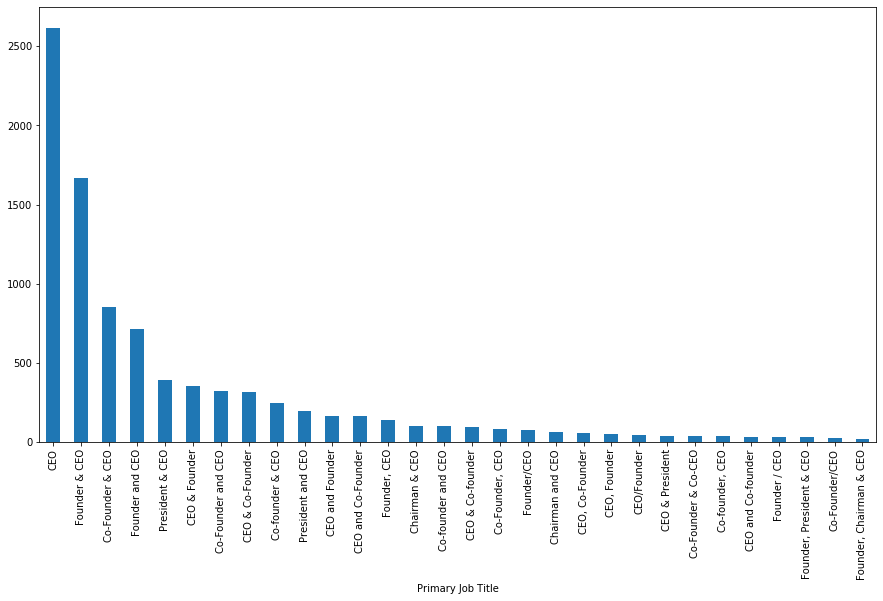

In [7]:
plt.figure(figsize=(15,8))
CEO_df.groupby('Primary Job Title')['Full Name'].count().sort_values(ascending=False).head(30).plot(kind='bar')
plt.savefig('../2_plots/CEO_exploration/top_titles.png', bbox_inches = 'tight', transparent=True)
plt.show()

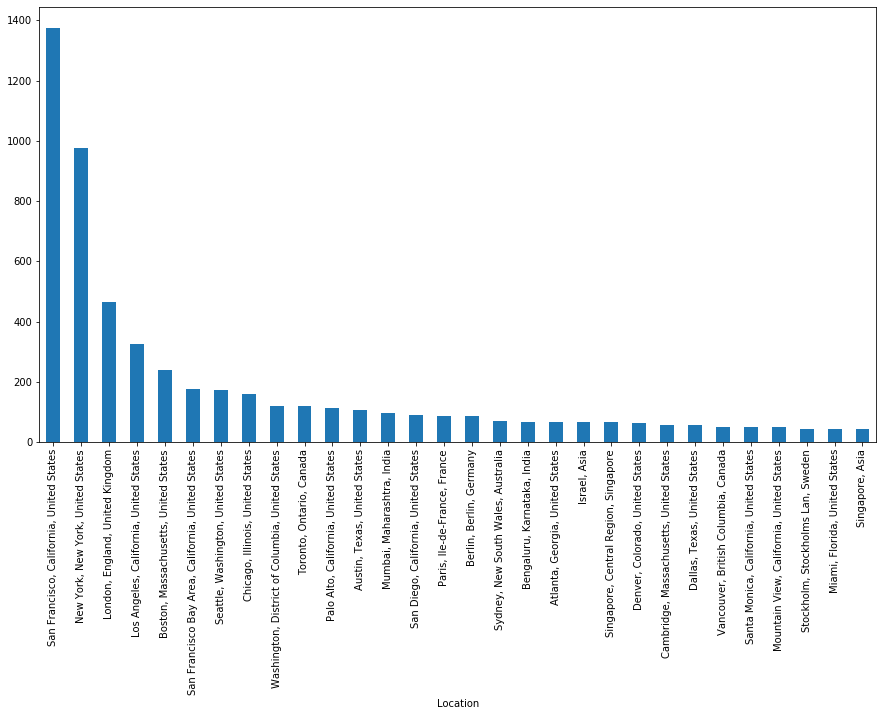

In [8]:
plt.figure(figsize=(15,8))
CEO_df.groupby('Location')['Full Name'].count().sort_values(ascending=False).head(30).plot(kind='bar')
plt.savefig('../2_plots/CEO_exploration/top_locations.png', bbox_inches = 'tight', transparent=True)
plt.show()

### Load organization lists from Crunchbase

These lists were generated by searching for organizations with revenues greater than $100M per year.

In [9]:
data_dir = "../1_data/potential_organizations/"
p = pathlib.Path(data_dir)

org_df = pd.DataFrame()
for file_path in p.glob('*.csv'):
    org_df = org_df.append(pd.read_csv(file_path, thousands=',', error_bad_lines=False))

org_df = org_df.drop_duplicates()

b'Skipping line 119: expected 24 fields, saw 33\n'


In [10]:
org_df.head()

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Full Description,Number of Articles,Website,Company Type,Closed Date,Closed Date Precision,Exit Date,Exit Date Precision,Founded Date,Founded Date Precision,Operating Status,Industry Groups,Number of Employees,Top 5 Investors,Number of Lead Investors,Founders,Last Leadership Hiring Date,Estimated Revenue Range
0,3M Health Care,https://www.crunchbase.com/organization/3m-hea...,Health Care,NaN,"Global leader offering medical, dental and ort...",436968,NaN,NaN,http://www.3m.com/3M/en_US/health-care-us/,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,Active,Health Care,NaN,NaN,NaN,NaN,NaN,$10B+
1,3M Health Information Systems,https://www.crunchbase.com/organization/3m-hea...,"Health Care, Information Services, Wellness","Cedar Valley, Utah, United States",3M Health Information Systems provides softwar...,248388,With nearly 30 years of healthcare industry ex...,8.0,https://www.3m.com/3M/en_US/health-information...,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,Active,"Health Care, Information Technology",251-500,NaN,NaN,NaN,NaN,$10B+
2,50Hertz,https://www.crunchbase.com/organization/50hertz,"Electrical Distribution, Energy, Energy Manage...","Berlin, Berlin, Germany",50Hertz is a high-voltage energy network opera...,36626,50Hertz is a high-voltage energy network opera...,1.0,http://www.50hertz.com,For Profit,NaN,NaN,NaN,NaN,2010-01-01,year,Active,Energy,251-500,Elia System Operator,NaN,NaN,NaN,$10B+
3,AB Volvo,https://www.crunchbase.com/organization/ab-volvo,"Automotive, Industrial, Manufacturing, Transpo...","Gothenburg, Vastra Gotaland, Sweden","AB Volvo is a manufacturers of trucks, buses, ...",96890,"AB Volvo is a manufacturers of trucks, buses, ...",39.0,http://www.volvogroup.com,For Profit,NaN,NaN,1935-01-01,day,1927-01-01,year,Active,"Manufacturing, Transportation",5001-10000,NaN,NaN,"Assar Gabrielsson, Gustaf Larson",NaN,$10B+
4,ABB,https://www.crunchbase.com/organization/abb-ef91,"Industrial Automation, Robotics","Skovlunde, Hovedstaden, Denmark",ABB offers digital solutions for industries an...,376670,NaN,NaN,http://www.abb.dk,For Profit,NaN,NaN,NaN,NaN,1988-01-01,day,Active,"Hardware, Manufacturing, Science and Engineeri...",10001+,NaN,NaN,NaN,NaN,$10B+


In [11]:
full_df = CEO_df.set_index('Primary Organization').join(org_df.set_index('Organization Name')).reset_index()
full_df = full_df.rename(columns={full_df['index'].name:'Organization'})

In [12]:
full_df.shape

(10665, 33)

In [13]:
full_df.sort_values(by='Number of News Articles')

,Organization,Full Name,Full Name URL,Primary Job Title,Primary Organization URL,Location,CB Rank (Person),Number of News Articles,Twitter,LinkedIn,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Full Description,Number of Articles,Website,Company Type,Closed Date,Closed Date Precision,Exit Date,Exit Date Precision,Founded Date,Founded Date Precision,Operating Status,Industry Groups,Number of Employees,Top 5 Investors,Number of Lead Investors,Founders,Last Leadership Hiring Date,Estimated Revenue Range
7487,Renesas Electronics Corporation,Ali Sebt,https://www.crunchbase.com/person/ali-sebt,"President, CEO",https://www.crunchbase.com/organization/renesa...,"San Francisco Bay Area, California, United States",95391,4,NaN,https://www.linkedin.com/in/ali-sebt-228a565/,https://www.crunchbase.com/organization/renesa...,"Electronics, Manufacturing, Retail, Semiconductor","Koto, Tokyo, Japan",Renesas Electronics provides semiconductor sol...,104616.0,Renesas Electronics is a semiconductor manufac...,231.0,https://www.renesas.com,For Profit,NaN,NaN,2003-08-01,day,2002-11-01,day,Active,"Commerce and Shopping, Consumer Electronics, H...",10001+,NaN,NaN,NaN,NaN,$1B to $10B
1312,Boost Payment Solutions,Dean Leavitt,https://www.crunchbase.com/person/dean-leavitt,Founder & CEO,https://www.crunchbase.com/organization/boost-...,"New York, New York, United States",64237,4,NaN,https://www.linkedin.com/in/dean-m-leavitt-562...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,Boost,Alex Maffeo,https://www.crunchbase.com/person/alex-c-maffeo,Founder and CEO,https://www.crunchbase.com/organization/boost-...,"New York, New York, United States",20890,4,https://twitter.com/AlexMaffeo,http://www.linkedin.com/pub/alex-maffeo/18/7a4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5749,Mighty,Joshua Schwadron,https://www.crunchbase.com/person/joshua-schwa...,CEO & Co-founder,https://www.crunchbase.com/organization/thatsm...,NaN,51468,4,http://twitter.com/joshuaschwadron,https://www.linkedin.com/in/schwadron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Booodl,George Freney,https://www.crunchbase.com/person/george-freney,Co-Founder & CEO,https://www.crunchbase.com/organization/booodl,"Sydney, New South Wales, Australia",63632,4,http://twitter.com/gfreney,http://www.linkedin.com/in/georgefreney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,Oprah Winfrey Network,Oprah Winfrey,https://www.crunchbase.com/person/oprah-winfrey,Chairwoman & CEO,https://www.crunchbase.com/organization/oprah-...,"Kosciusko, Mississippi, United States",144,3457,http://twitter.com/Oprah,https://www.linkedin.com/in/owinfrey/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6128,Netflix,Reed Hastings,https://www.crunchbase.com/person/reed-hastings,CEO,https://www.crunchbase.com/organization/netflix,"Los Gatos, California, United States",315,3478,http://twitter.com/reedhastings,http://www.linkedin.com/in/reedhastings,https://www.crunchbase.com/organization/netflix,"Digital Entertainment, Media and Entertainment...","Los Gatos, California, United States",Netflix is an online platform that enables use...,8.0,Netflix is an online platform that enables use...,94847.0,https://www.netflix.com,For Profit,NaN,NaN,2002-05-23,day,1997-01-01,day,Active,"Content and Publishing, Media and Entertainmen...",1001-5000,"Foundation Capital, IVP, TCV, Reed Hastings, G...",4.0,"Marc Randolph, Reed Hastings",2020-11-09,$10B+
2525,Dell,Michael Dell,https://www.crunchbase.com/person/michael-dell,CEO,https://www.crunchbase.com/organization/dell,"Houston, Texas, United States",559,3626,http://twitter.com/mic

In [14]:
full_df.describe(include='all')

,Organization,Full Name,Full Name URL,Primary Job Title,Primary Organization URL,Location,CB Rank (Person),Number of News Articles,Twitter,LinkedIn,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Full Description,Number of Articles,Website,Company Type,Closed Date,Closed Date Precision,Exit Date,Exit Date Precision,Founded Date,Founded Date Precision,Operating Status,Industry Groups,Number of Employees,Top 5 Investors,Number of Lead Investors,Founders,Last Leadership Hiring Date,Estimated Revenue Range
count,10664,10665,10665,10665,10664,8981,1.066500e+04,10665.000000,6174,9345,943,942,943,943,9.430000e+02,920,931.000000,943,938,0,0,679,679,941,941,943,942,942,542,448.000000,725,251,943
unique,10508,10591,10656,945,10532,1035,NaN,NaN,6170,9337,872,813,351,872,NaN,851,NaN,872,2,0,0,498,2,398,3,1,603,8,483,NaN,667,139,4
top,Discovery,Kevin Johnson,https://www.crunchbase.com/person/david-m-zaslav,CEO,https://www.crunchbase.com/organization/discov...,"San Francisco, California, United States",NaN,NaN,https://twitter.com/davidzaslav,https://www.linkedin.com/in/bill-goodwyn-4446a0,https://www.crunchbase.com/organization/newsco...,"Banking, Finance, Financial Services","New York, New York, United States",News Corp. is a network of leading companies i...,NaN,Samsung Electronics is a South Korean multinat...,NaN,http://www.newscorp.com/,For Profit,NaN,NaN,1978-01-13,day,1999-01-01,year,Active,"Financial Services, Lending and Investments",10001+,US Department of Energy,NaN,John S. Hendricks,2020-08-27,$100M to $500M
freq,9,4,3,2617,9,1375,NaN,NaN,3,3,4,8,92,4,NaN,4,NaN,4,936,NaN,NaN,55,677,22,596,943,33,338,8,NaN,6,6,358
mean,NaN,NaN,NaN,NaN,NaN,NaN,9.584302e+04,36.323207,NaN,NaN,NaN,NaN,NaN,NaN,4.102665e+04,NaN,5030.210526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.953125,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.328710e+05,148.835062,NaN,NaN,NaN,NaN,NaN,NaN,7.608443e+04,NaN,27478.902121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.298707,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.578200e+04,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.531500e+03,NaN,112.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.785900e+04,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.176900e+04,NaN,399.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.155860e+05,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.730900e+04,NaN,1649.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN


Okay, so now that we've got the organizations that go with the people, we can answer some interesting questions.

How many people are on this list that have an organization with revenues greater than $100 Million per year?

In [15]:
interesting_CEOs_df = full_df[~(full_df.Industries.isna()) & (full_df['Operating Status']=='Active')]
interesting_CEOs_df

,Organization,Full Name,Full Name URL,Primary Job Title,Primary Organization URL,Location,CB Rank (Person),Number of News Articles,Twitter,LinkedIn,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Full Description,Number of Articles,Website,Company Type,Closed Date,Closed Date Precision,Exit Date,Exit Date Precision,Founded Date,Founded Date Precision,Operating Status,Industry Groups,Number of Employees,Top 5 Investors,Number of Lead Investors,Founders,Last Leadership Hiring Date,Estimated Revenue Range
21,23andMe,Anne Wojcicki,https://www.crunchbase.com/person/anne-wojcicki,Co-Founder and CEO,https://www.crunchbase.com/organization/23andme,"San Francisco, California, United States",298,524,https://twitter.com/annewoj23,https://www.linkedin.com/in/annewojcicki,https://www.crunchbase.com/organization/23andme,"Biotechnology, Consumer, Genetics","Mountain View, California, United States",23andMe is a human genome research company tha...,437.0,23andMe is a human genome research company ena...,1794.0,http://23andme.com,For Profit,NaN,NaN,NaN,NaN,2006-04-01,day,Active,"Biotechnology, Health Care, Other, Science and...",501-1000,"National Institutes of Health, Google, Sequoia...",6.0,"Anne Wojcicki, Linda Avey, Paul Cusenza",NaN,$100M to $500M
42,3M,Inge Thulin,https://www.crunchbase.com/person/inge-g-thulin,President & CEO,https://www.crunchbase.com/organization/3m,NaN,45432,49,NaN,NaN,https://www.crunchbase.com/organization/3m,"Automotive, Electronics, Enterprise Software, ...","Saint Paul, Minnesota, United States",3M operates as a diversified technology compan...,40692.0,3M operates as a diversified technology compan...,2039.0,https://www.3m.com,For Profit,NaN,NaN,1978-01-13,day,1902-01-01,year,Active,"Consumer Electronics, Hardware, Manufacturing,...",10001+,NaN,NaN,"Danley Budd, Henry Bryan, Hermon Cable, John D...",2020-06-03,$1B to $10B
77,ABC News,Daniel Raffel,https://www.crunchbase.com/person/daniel-raffel,CEO @ Snapguide,https://www.crunchbase.com/organization/abc-news,NaN,141123,45,http://twitter.com/danielraffel,http://www.linkedin.com/in/danielraffel,https://www.crunchbase.com/organization/abc-news,"Blogging Platforms, Broadcasting, Fashion, Med...","New York, New York, United States",ABCNews is a breaking news resource for top st...,68737.0,ABCNews is your breaking news resource for top...,2241.0,http://abcnews.go.com/,For Profit,NaN,NaN,NaN,NaN,1962-01-01,year,Active,"Clothing and Apparel, Content and Publishing, ...",1001-5000,NaN,NaN,Avinash Pandey,2020-10-23,$1B to $10B
83,ACT 1 Group,Janice Bryant Howroyd,https://www.crunchbase.com/person/janice-bryan...,Founder and CEO,https://www.crunchbase.com/organization/act-1-...,"Los Angeles, California, United States",69870,6,https://twitter.com/JBryantHowroyd,https://www.linkedin.com/in/janicebryanthowroyd,https://www.crunchbase.com/organization/act-1-...,"Association, Communities, Human Resources, Sma...","Torrance, California, United States",ActOne Group is a global enterprise that provi...,138003.0,ActOne Group is a global enterprise that provi...,2.0,https://www.act1group.com,For Profit,NaN,NaN,NaN,NaN,1978-01-01,year,Active,"Administrative Services, Community and Lifesty...",1001-5000,NaN,NaN,Janice Bryant Howroyd,NaN,$100M to $500M
84,ACV,George Chamoun,https://www.crunchbase.com/person/george-chamoun,CEO,https://www.crunchbase.com/organization/acv-au...,"Buffalo, New York, United States",7902,8,NaN,http://www.linkedin.com/in/georgechamoun,https://www.crunchbase.com/organization/acv-au...,"Apps, Automotive, Marketplace, Mobile Apps","Buffalo, New York, United States",ACV is a full-service dealer marketplace that ...,922.0,ACV provides a pricing application (app) for f...,27.0,https://www.acvauctions.com/,For Profit,NaN,NaN,NaN,NaN,2014-01-01,year,Active,"Apps, Commerce and Shopping, Mobile, Software,...",1001-5000,"SoftBank, Bain Capital Ventures, Wellington Ma...",8.0,"Daniel Magnuszewski, Jack Greco, Joseph Neiman",NaN,$100M to

In [16]:
list(interesting_CEOs_df.columns)

['Organization',
 'Full Name',
 'Full Name URL',
 'Primary Job Title',
 'Primary Organization URL',
 'Location',
 'CB Rank (Person)',
 'Number of News Articles',
 'Twitter',
 'LinkedIn',
 'Organization Name URL',
 'Industries',
 'Headquarters Location',
 'Description',
 'CB Rank (Company)',
 'Full Description',
 'Number of Articles',
 'Website',
 'Company Type',
 'Closed Date',
 'Closed Date Precision',
 'Exit Date',
 'Exit Date Precision',
 'Founded Date',
 'Founded Date Precision',
 'Operating Status',
 'Industry Groups',
 'Number of Employees',
 'Top 5 Investors',
 'Number of Lead Investors',
 'Founders',
 'Last Leadership Hiring Date',
 'Estimated Revenue Range']

In [17]:
interesting_CEOs_df.shape

(942, 33)

In [18]:
revenue_map = {'$100M to $500M': '1-$100M to $500M'
               , '$500M to $1B': '2-$500M to $1B'
               , '$1B to $10B': '3-$1B to $10B'
               , '$10B+':'4: $10B+'
              }
emp_map={'251-500': '1-251-500'
         , '501-1000': '2-501-1000'
         , '1001-5000': '3-1001-5000'
         , '5001-10000': '4-5001-10000'
         , '10001+': '5-10001+'
        }


interesting_CEOs_df['revenue_index'] = interesting_CEOs_df['Estimated Revenue Range'].map(revenue_map)
interesting_CEOs_df['employee_index'] = interesting_CEOs_df['Number of Employees'].map(emp_map)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


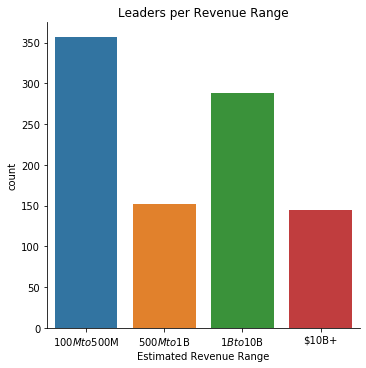

In [19]:
g = sns.catplot(data=interesting_CEOs_df.sort_values(by='revenue_index')
                 , x='Estimated Revenue Range'
                 , kind='count'
                )
g.axes[0][0].set_title('Leaders per Revenue Range')
plt.savefig('../2_plots/CEO_exploration/leaders_per_revenue_range.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [20]:
g = sns.catplot(data=interesting_CEOs_df.sort_values(by='employee_index')
                 , x='Number of Employees'
                 , kind='count'
                , order=emp_order
                )
g.axes[0][0].set_title('Leaders per Employee Range')
plt.savefig('../2_plots/CEO_exploration/leaders_per_employee_range.png', bbox_inches = 'tight', transparent=True)
plt.show()

NameError: name 'emp_order' is not defined

In [ ]:
ax = sns.distplot(interesting_CEOs_df['Number of News Articles'], kde=False)
ax.set_ylabel('Count of Leaders')
plt.show()

In [ ]:
ax = sns.distplot(np.log(interesting_CEOs_df['Number of News Articles']), kde=False)
ax.set_xlabel('log(Number of News Articles)')
ax.set_ylabel('Count of Leaders')
plt.savefig('../2_plots/CEO_exploration/news_articles_distribution_leaders.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:
list(interesting_CEOs_df['Industries'].str.get_dummies(sep=',').columns)


In [ ]:
list(interesting_CEOs_df['Industry Groups'].str.get_dummies(sep=',').columns)


In [ ]:
# Some data wrangling to make plotting by industry easier

columns = ['Organization',
 'Full Name',
 'Primary Job Title',
 'Location',
 'Number of News Articles',
 'Number of Articles',
 'Company Type',
 'Founded Date',
 'Founded Date Precision',
 'Operating Status',
 'Number of Employees',
 'Top 5 Investors',
 'Number of Lead Investors',
 'Founders',
 'Last Leadership Hiring Date',
 'Estimated Revenue Range',
 'employee_index',
 'revenue_index']

In [ ]:
# split industry groups
data_df = interesting_CEOs_df[columns + ['Industry Groups']].copy()
data_df['Industry Groups'] = data_df['Industry Groups'].str.split(', ')
# explode the column
data_df = data_df.explode('Industry Groups').reset_index(drop=True)
data_df.head()


In [ ]:
top_10_industry_groups = list(data_df.groupby('Industry Groups')['Full Name'].count().sort_values(ascending=False).reset_index()['Industry Groups'].head(10))
top_10_industry_groups

In [ ]:
plt.figure(figsize=(20,10))
ax = data_df.groupby('Industry Groups')['Full Name'].count().sort_values(ascending=False).plot(kind='bar')
plt.savefig('../2_plots/CEO_exploration/top_industry_groups.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:
revenue_order = ['$100M to $500M', '$500M to $1B', '$1B to $10B', '$10B+']
g = sns.catplot(data=data_df[data_df['Industry Groups'].isin(top_10_industry_groups)]
                , x='Estimated Revenue Range'
                , kind='count'
                , col='Industry Groups'
                , col_wrap=5
                , order=revenue_order
               )
plt.savefig('../2_plots/CEO_exploration/revenues_by_industry.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:
interesting_CEOs_df['Number of Employees'].unique()

In [ ]:
emp_order=['251-500', '501-1000', '1001-5000', '5001-10000', '10001+']
g = sns.catplot(data=data_df.sort_values(by='employee_index')
                , y='Number of News Articles'
                , x='Number of Employees'
                , kind='box'
                , order=emp_order
                , col='Industry Groups'
                , col_wrap=4
               )
g.axes[0].set_yscale('log')
plt.savefig('../2_plots/CEO_exploration/news_articles_by_number_employees_by_industry.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:
emp_order=['251-500', '501-1000', '1001-5000', '5001-10000', '10001+']
g = sns.catplot(data=data_df[data_df['Industry Groups'].isin(top_10_industry_groups)].sort_values(by='employee_index')
                , y='Number of News Articles'
                , x='Number of Employees'
                , kind='box'
                , order=emp_order
                , col='Industry Groups'
                , col_wrap=5
               )
g.axes[0].set_yscale('log')
plt.savefig('../2_plots/CEO_exploration/news_articles_by_number_employees_by_industry_top10.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:
emp_order=['251-500', '501-1000', '1001-5000', '5001-10000', '10001+']
g = sns.catplot(data=data_df.sort_values(by='employee_index')
                , y='Number of News Articles'
                , x='Number of Employees'
                , kind='box'
                , order=emp_order
               )
g.axes[0][0].set_yscale('log')
plt.savefig('../2_plots/CEO_exploration/news_articles_by_number_employees.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:
g = sns.catplot(data=data_df.sort_values(by='revenue_index')
                , y='Number of News Articles'
                , x='Estimated Revenue Range'
                , kind='box'
                , order=revenue_order
               )
g.axes[0][0].set_yscale('log')
plt.savefig('../2_plots/CEO_exploration/news_articles_by_revenue.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:
g = sns.catplot(data=data_df
                , x='Number of Employees'
                , kind='count'
                , col='Estimated Revenue Range'
                , col_wrap=4
                , col_order=revenue_order
                , order=emp_order
               )
plt.savefig('../2_plots/CEO_exploration/employees_by_revenues.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [ ]:


fig, ax = plt.subplots(figsize=(20, 15))
mosaic(interesting_CEOs_df.sort_values(by=['employee_index', 'revenue_index']), ['Number of Employees', 'Estimated Revenue Range'], ax=ax)
plt.savefig('../2_plots/CEO_exploration/employees_by_revenues_mosaic.png', bbox_inches = 'tight', transparent=True)
plt.show()


In [ ]:
interesting_CEOs_df.to_csv('../1_data/lists/interesting_CEOs_list1.csv')

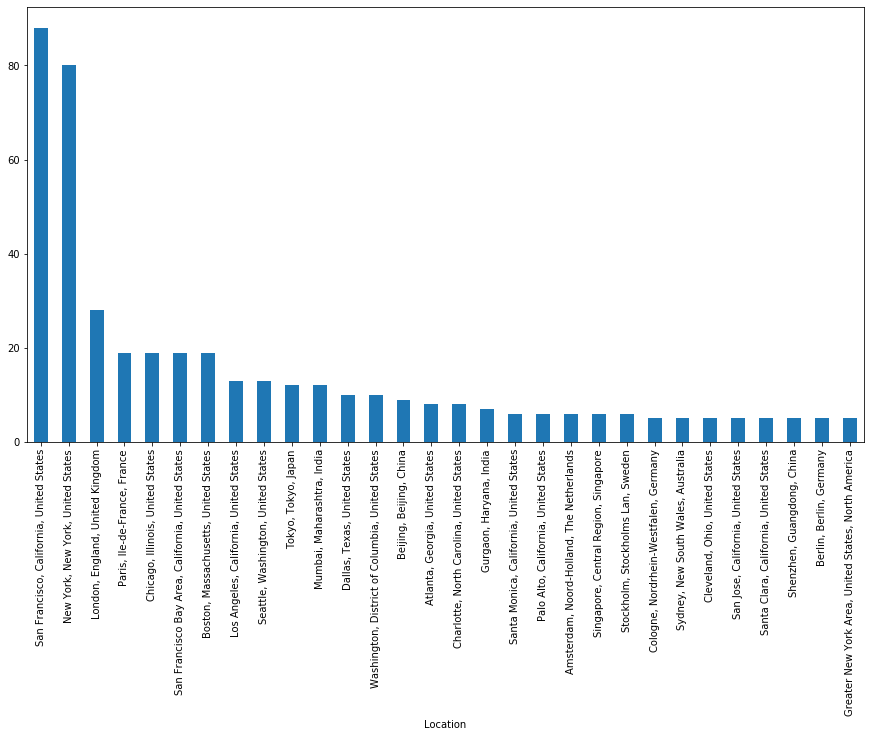

In [21]:
plt.figure(figsize=(15,8))
interesting_CEOs_df.groupby('Location')['Full Name'].count().sort_values(ascending=False).head(30).plot(kind='bar')
plt.savefig('../2_plots/CEO_exploration/top_locations_interesting.png', bbox_inches = 'tight', transparent=True)
plt.show()